<a href="https://colab.research.google.com/github/ManuelGalvis04/Analisis_de_Datos/blob/main/ANALISIS_TITANIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTAMOS LIBRERIA⬇️

In [236]:
import pandas as pd

In [237]:
import matplotlib.pyplot as plt
import seaborn as sns

ABRIMOS EL ARCHIVO⬇️

In [238]:
titanic = pd.read_csv("titanic.csv")

OBSERVAMOS LA CANTIDAD DE REGISTROS QUE HAY EN CADA COLUMNA⬇️

In [239]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Podemos ver la cantidad de datos nulos en cada columna.⬇️

In [240]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

CANTIDAD DE SOBREVIVENTES

SI--> 1

NO--> 0

⬇️

In [241]:
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

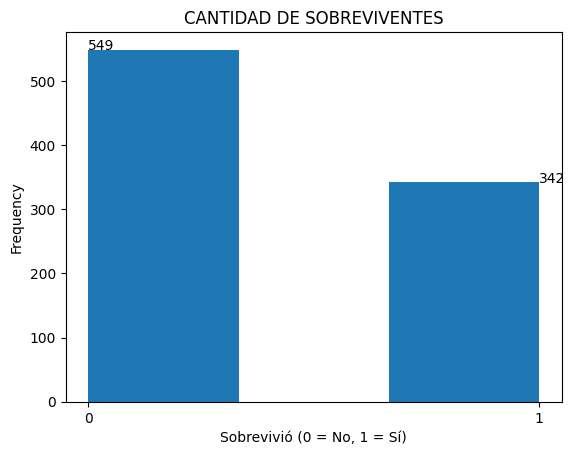

In [242]:
plt.hist(titanic['Survived'], bins = 3)

plt.xticks([0, 1])
plt.xlabel('Sobrevivió (0 = No, 1 = Sí)')
plt.ylabel('Frequency')
plt.title('CANTIDAD DE SOBREVIVENTES')

survived = titanic['Survived'].value_counts()
for k, surv in enumerate(survived):
  plt.text(k, surv, str(surv))

plt.show()

**CANTIDAD** DE PASAJEROS ENTRE HOMBRES Y MUJERES⬇️

In [243]:
titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

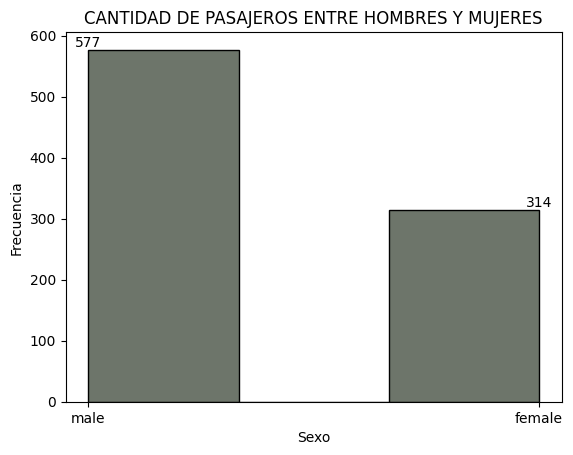

In [244]:

plt.hist(titanic['Sex'], bins=3, color='#6d756a', ec='black')

plt.xlabel('Sexo')
plt.ylabel('Frecuencia')
plt.title('CANTIDAD DE PASAJEROS ENTRE HOMBRES Y MUJERES')

frecuencias = titanic['Sex'].value_counts()

# Mostrar los valores encima de las barras
for i, frecuencia in enumerate(frecuencias):
    plt.text(i, frecuencia, str(frecuencia), ha='center', va='bottom')

plt.show()


PROMEDIO DE EDAD DE LAS PERSONAS QUE HABIAN EN EL TITANIC⬇️

In [245]:
titanic['Age'].mean()

29.69911764705882

EDAD MINIMA⬇️

In [246]:
titanic['Age'].min()


0.42

EDAD MAXIMA⬇️

In [247]:
titanic['Age'].max()

80.0

PROMEDIO DE EDAD ENTRE MUJERES Y HOMBRES⬇️

In [248]:
Prom = titanic.groupby('Sex')['Age'].agg(['mean'])

CANTIDAD DE SOBREVIVIENTES POR EL TIPO DE CLASE⬇️

In [249]:
Prom_tip_clase = titanic.groupby('Pclass')['Survived'].sum()
Prom_tip_clase

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

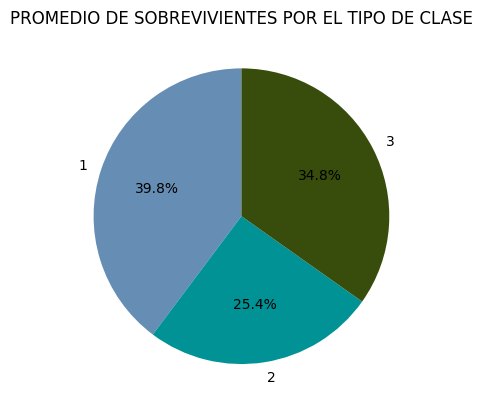

In [250]:
# Crear el gráfico de pastel
plt.pie(Prom_tip_clase, labels=Prom_tip_clase.index, autopct='%1.1f%%', startangle=90, colors=['#668eb4', '#019295', '#384d0c'])
plt.title('PROMEDIO DE SOBREVIVIENTES POR EL TIPO DE CLASE')
plt.show()


DISTRIBUCIÓN DE LA CANTIDAD DE PASAJEROS EN CADA PUERTO DE EMBARQUE

(C = Cherbourg; Q = Queenstown; S = Southampton)

⬇️

In [251]:
Port_Embarked = titanic.groupby('Embarked')['PassengerId'].agg('count')
Port_Embarked

Embarked
C    168
Q     77
S    644
Name: PassengerId, dtype: int64

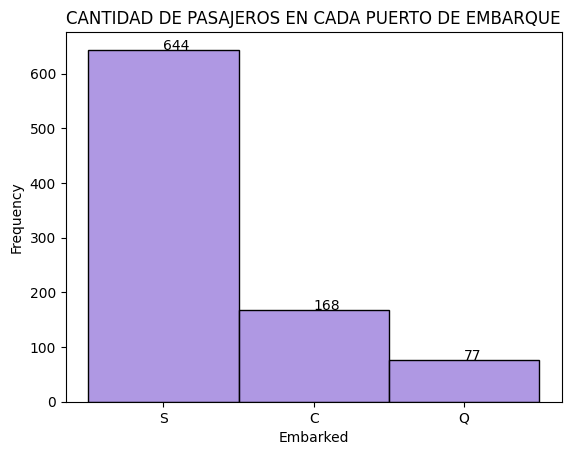

In [252]:
sns.histplot(titanic['Embarked'], bins=5, color='#9476da')

plt.xlabel('Embarked')
plt.ylabel('Frequency')
plt.title('CANTIDAD DE PASAJEROS EN CADA PUERTO DE EMBARQUE')

frecuencias = titanic['Embarked'].value_counts()

for i, frec in enumerate(frecuencias):
  plt.text(i, frec, str(frec))

plt.show()

CANTIDAD DE SOBREVIVIENTES POR RANGO DE EDAD ⬇️

In [253]:
data = titanic.groupby('Age')['Survived'].agg('count')

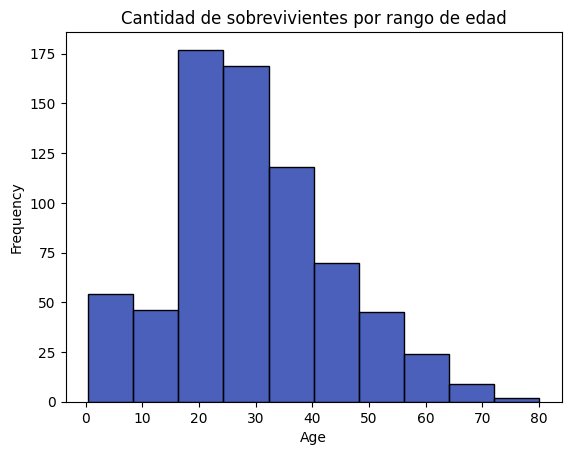

In [254]:
sns.histplot(data=titanic,x = 'Age', bins = 10, color= '#0d2ba5')

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Cantidad de sobrevivientes por rango de edad')

plt.show()